# 房價預測 - 選擇模型/評估
本次的課程將學習如何實作迴歸分析模型，目的是利用房子的相關資訊，來預測該房價；藉由此項專案將學會如何使用python裡的套件pandas和numpy來操作資料、並利用matplotlib、seaborn視覺化資料，以及用keras來搭建深度學習的模型。

### 環境提醒及備註
在執行本範例前請先確認Jupyter筆記本設置是否正確，首先點選主選單的「修改」─「筆記本設置」─「運行類別」，選擇「Python3」，同時將「硬件加速器」下拉式選單由「None」改成「GPU」，再按「保存」。

### 課程架構
在這個範例中我們將帶著大家建構一個機器學習的模型，並進行房價預測，主要包括下面四個步驟：

>1.   如何進行資料前處理(Processing)

>2.   如何探索式數據分析(Exploratory Data Analysis)

>3.   如何實作特徵工程(Feature Engineering)

>4.   如何模型選擇訓練成果進行推論(Inference) 

---

**4.1 載入所需套件**

---

In [23]:
# 4-1
# 首先載入所需套件，一般會利用import (package_name) as (xxx) 來簡化套件名稱，使得之後呼叫它們時更方便

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 基於matplotlib提供更多高階視覺化的套件
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model

from sklearn.metrics import mean_absolute_error #平方絕對誤差
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
import itertools
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

import xgboost as xgb

In [25]:
# 4-2
# 可以用pandas裡面的函式來讀取csv檔，使用方法為pd.read_csv('檔案名稱')

train = pd.read_csv('train/train-v3.csv')
test = pd.read_csv('test/test-v3.csv')
valid = pd.read_csv('vaild/valid-v3.csv')

In [26]:
# 4-3

train = train.drop('id',axis=1)

In [27]:
# 4-4

train_use = train.values
x_train = train_use[:,1:21]
y_train = train_use[:,0]

In [28]:
# 4-5

test_use = test.values
x_test = test_use[:,1:21]

In [29]:
# 4-6

valid_use = valid.values
x_valid = valid_use[:, 2:22]
y_valid = valid_use[:, 1]

In [30]:
---

**4.2 正規化**

---

SyntaxError: invalid syntax (<ipython-input-30-8ffc96496787>, line 1)

In [31]:
# 4-7

def normalize(train, valid , test):
    tmp = train
    mean, std = tmp.mean(axis=0), tmp.std(axis=0)
    print("tmp,shape =", tmp.shape)
    print("mean.shape =", mean.shape)
    print("std.shape = ", std.shape)
    print("mean = ",mean)
    print("std = ",std)
    train = (train - mean) / std
    valid = (valid - mean) / std
    test = (test - mean) / std

    return train, valid, test

In [32]:
# 4-8

X_train ,X_valid ,X_test = normalize(x_train, x_valid, x_test)

tmp,shape = (12967, 20)
mean.shape = (20,)
std.shape =  (20,)
mean =  [ 2.01432251e+03  6.57206756e+00  1.57299298e+01  3.36238143e+00
  2.10605768e+00  2.07129506e+03  1.49953877e+04  1.44289350e+00
  8.02035937e-03  2.34209917e-01  3.41613326e+00  7.64602452e+00
  1.78174181e+03  2.89553251e+02  1.97076695e+03  8.29488702e+01
  9.80784592e+04  4.75589099e+01 -1.22214565e+02  1.98014367e+03]
std =  [4.67437323e-01 3.10767170e+00 8.61917267e+00 9.41087586e-01
 7.65250424e-01 9.19319729e+02 3.87504117e+04 5.51606293e-01
 8.91965986e-02 7.69377298e-01 6.52486031e-01 1.17114391e+00
 8.26549042e+02 4.40725638e+02 2.94716406e+01 3.98318370e+02
 5.35229912e+01 1.38972885e-01 1.40475493e-01 6.83545964e+02]


---

**4.3 搭建&訓練模型**

---

In [33]:
# 4-9
# create model

model = Sequential()
model.add(Dense(units=32, input_shape=(20,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(units=64, input_shape=(32,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=96, input_shape=(64,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, input_shape=(96,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, input_shape=(128,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=20, input_shape=(256,), kernel_initializer='random_uniform', activation='relu'))

model.add(Dense(units=1, kernel_initializer='random_uniform'))

In [34]:
# 4-10
# choose loss function and optimizing method

model.compile(loss='mae', optimizer='adam')

epochs = 10
batch_size = 32

file_name = str(epochs) + '_' + str(batch_size)

history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=100, 
                    validation_data=(x_valid, y_valid))

Train on 12967 samples, validate on 2161 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


---

**4.4 評估模型**

---

In [36]:
# 4-11

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
print(history.history)
print(loss)
print(val_loss)

{'val_loss': [175091.53015820222, 158764.2321118695, 173218.25055674458, 153236.9923791069, 153043.57225387552, 151638.2713804373, 150793.4531105391, 151055.34844979175, 155986.49996384775, 158706.7057135007], 'loss': [245665.84716491864, 172089.15251817112, 165975.7012307685, 166689.8743221977, 163624.58092296793, 164131.404054523, 162837.3651070988, 163659.17900789023, 162731.4249079394, 160743.79226112438]}
[245665.84716491864, 172089.15251817112, 165975.7012307685, 166689.8743221977, 163624.58092296793, 164131.404054523, 162837.3651070988, 163659.17900789023, 162731.4249079394, 160743.79226112438]
[175091.53015820222, 158764.2321118695, 173218.25055674458, 153236.9923791069, 153043.57225387552, 151638.2713804373, 150793.4531105391, 151055.34844979175, 155986.49996384775, 158706.7057135007]


Text(0.5,1,'Training and validation loss')

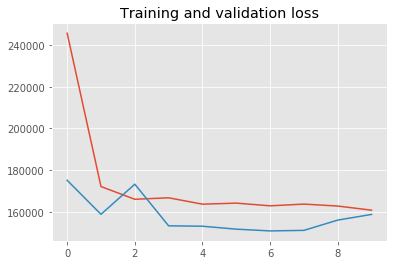

In [37]:
# 4-12
# Plot training and validation loss per epoch

plt.figure()
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [16]:
# 4-13

model.save(file_name+'.h5')

In [17]:
filepath = '10_32.h5'
model = load_model(filepath)

Y_predict = model.predict(X_test)

print('Test score:', Y_predict)
np.savetxt('predict.csv', Y_predict, delimiter = ',')

Test score: [[  64.1662 ]
 [1079.1415 ]
 [  64.83055]
 ...
 [  60.42154]
 [  68.59599]
 [  60.78566]]


In [18]:
import csv
with open('predict.csv', newline='') as csvfile:

  # 以冒號分隔欄位，讀取檔案內容
  rows = csv.reader(csvfile, delimiter=',')

  with open('predict_integer.csv','w',newline='') as out:
    csv_write = csv.writer(out)
    for row in rows:
        a=round(float(row[0]))
        tmp = []
        tmp.append(str(a))
        csv_write.writerow(tmp)


print(a)

61


In [19]:
# 4-14

valid_predict=model.predict(x_valid)

In [20]:
# 4-15

train_predict=model.predict(x_train)



151313.92241965182


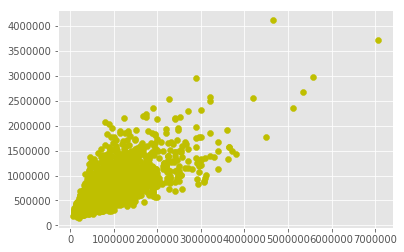

In [21]:
# 4-16

plt.figure()
plt.scatter(y_train,train_predict,c='Y')
MAE_train = mean_absolute_error(y_train,train_predict)
print('\n')
print(MAE_train)



148158.80448866266


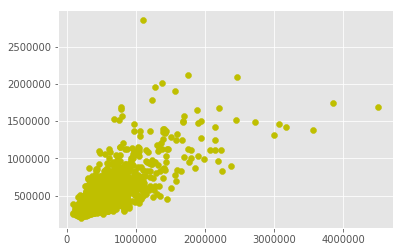

In [22]:
# 4-17

plt.figure()
plt.scatter(y_valid,valid_predict,c='Y')
MAE_valid = mean_absolute_error(y_valid,valid_predict)
print('\n')
print(MAE_valid)

----

In [37]:
# 4-18
# 定義驗證函數

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [38]:
# 4-19
# XGBOOST

clf3=xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.045,
                 learning_rate=0.07,
                 max_depth=20,
                 min_child_weight=1.5,
                 n_estimators=300,
                 reg_alpha=0.65,
                 reg_lambda=0.45,
                 subsample=0.95)
 
clf3.fit(X_train, y_train)
xgb_preds = np.expm1(clf3.predict(X_test))
 
 
score3 = rmse_cv(clf3)
print("\nxgb score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

[15:31:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

xgb score: 2451760858.7390 (28287037.5902)



----